<a href="https://colab.research.google.com/github/D1EGO-R0JAS/Logistic_Regression/blob/main/Proyecto_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importamos las librerias y el dataset para nuestro modelo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


ahora vamos a preparar los datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

aqui vemos que hay una columna que tiene muchos nulls y si se elimina con dropna nos quedamos sin datos, es por esto que eliminamos toda la columna

In [4]:
df = df.drop(df.columns[-1], axis=1)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Eliminamos la columna de id que no ayuda para nada nuestro modelo

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


cambiamos los datos de diagnostico por 1 y 0 donde 1 es maligno y 0 es benigno.

In [8]:
df['diagnosis'].replace(to_replace='M', value=1, inplace=True)
df['diagnosis'].replace(to_replace='B', value=0, inplace=True)

In [9]:
df_copy = df.copy()

Evaluamos la correlacion de las columnas.

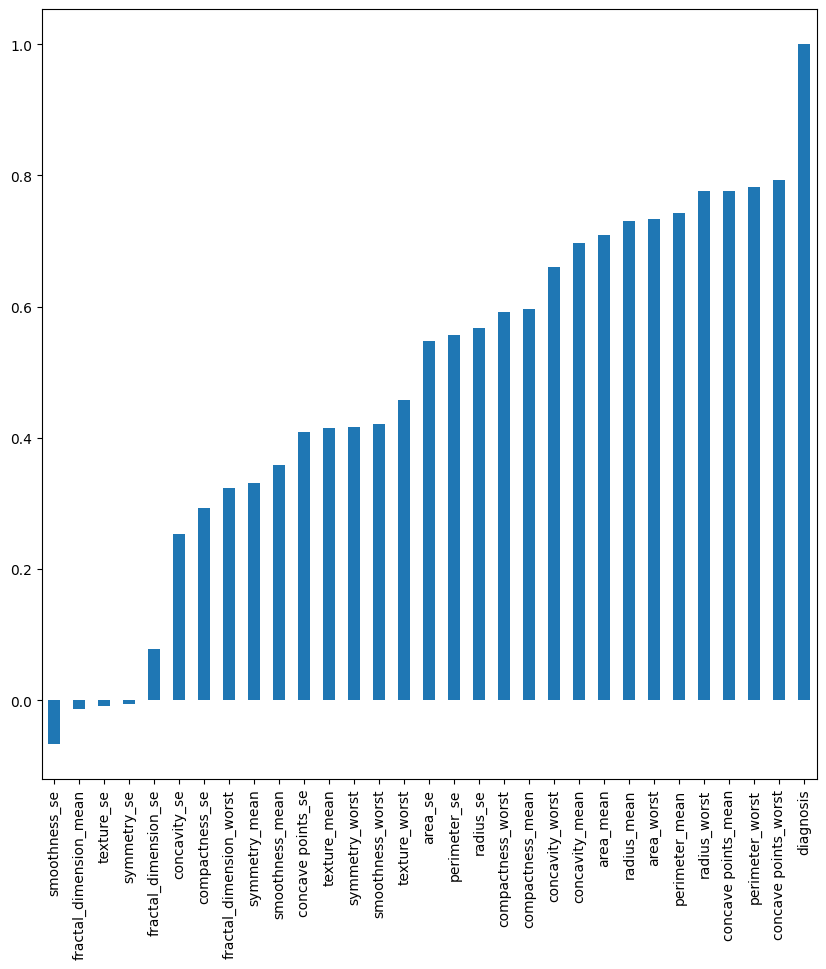

In [10]:
fig = plt.figure(figsize=(10,10))
df_copy.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

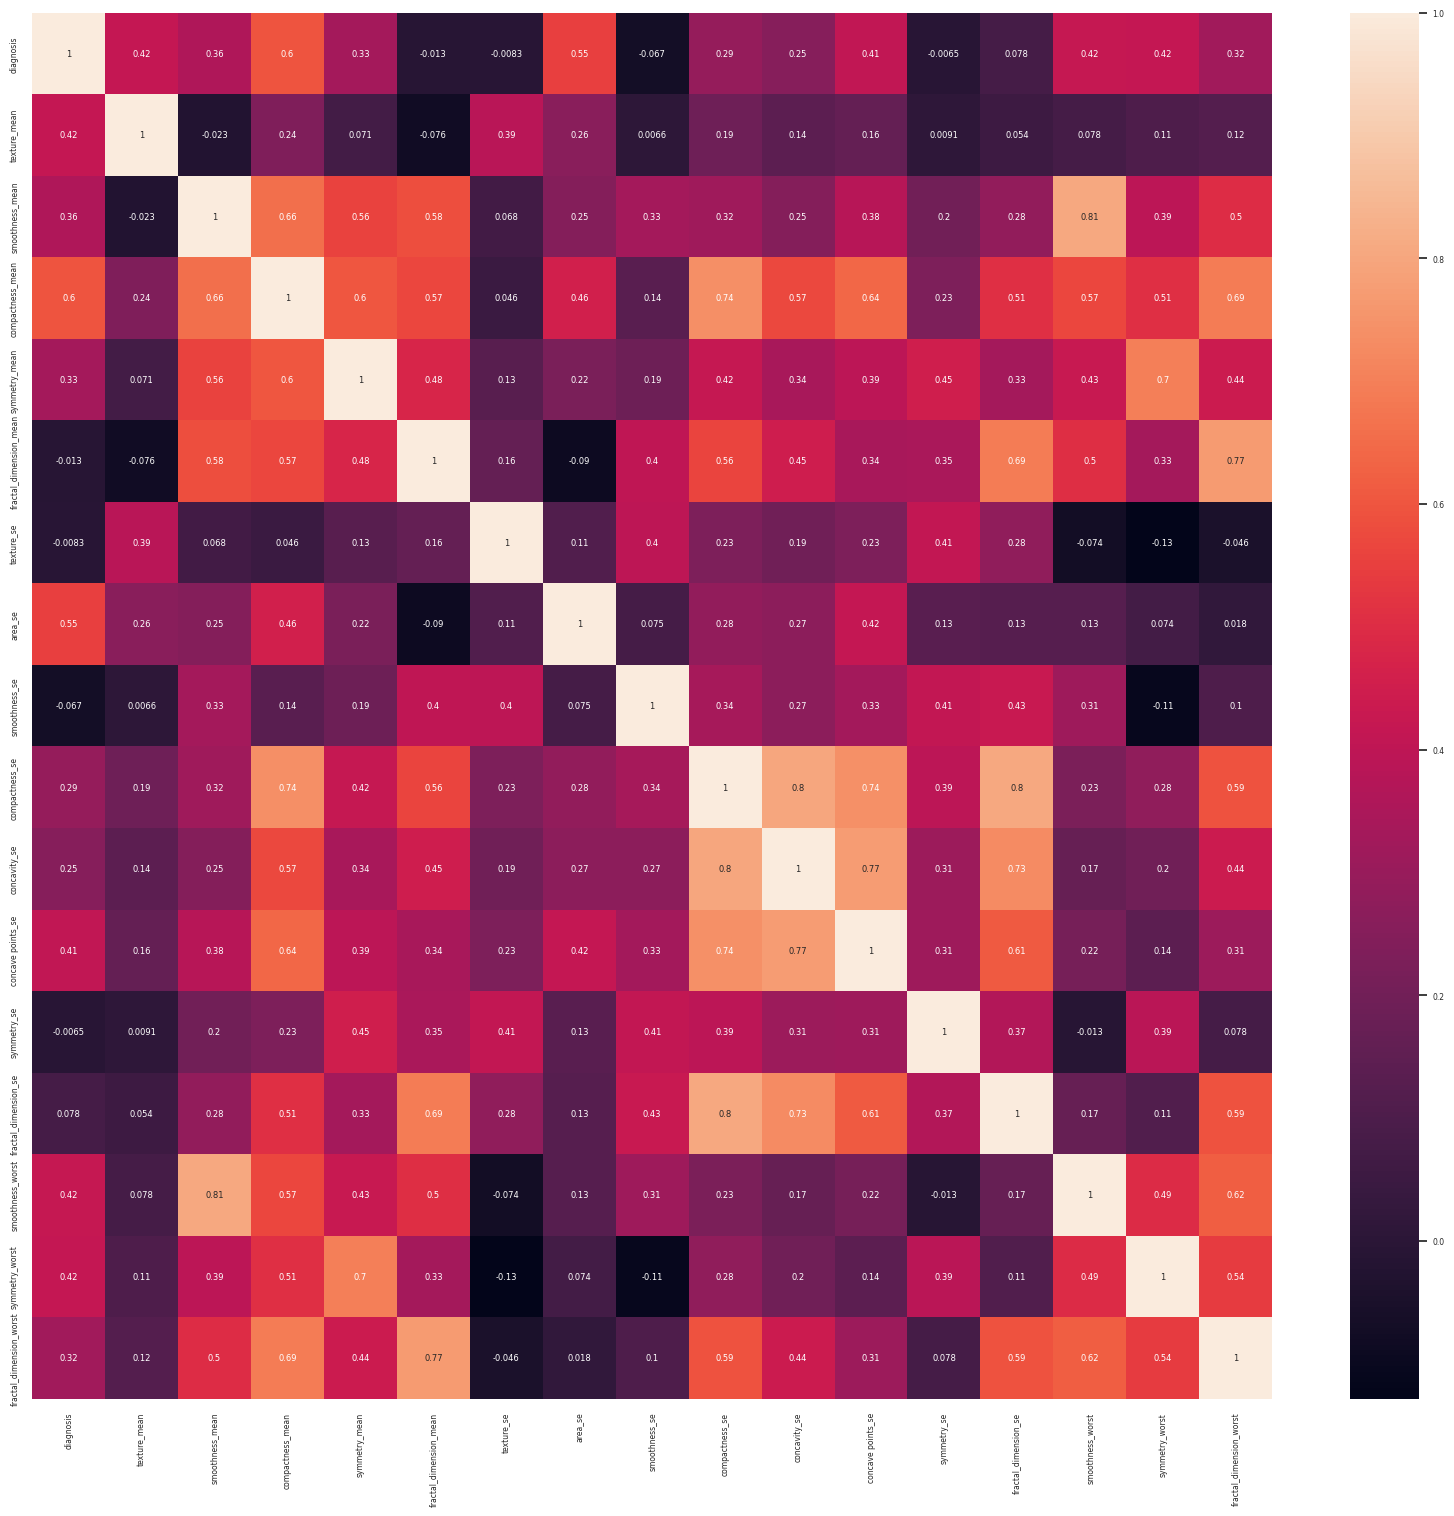

In [32]:
fig = plt.figure(figsize=(20,18))
sns.heatmap(df_copy.corr(), annot=True)
sns.set(font_scale=.5)
plt.show()

revisamos si nuestra variable objetivo esta desbalanceada.

<Axes: xlabel='diagnosis', ylabel='count'>

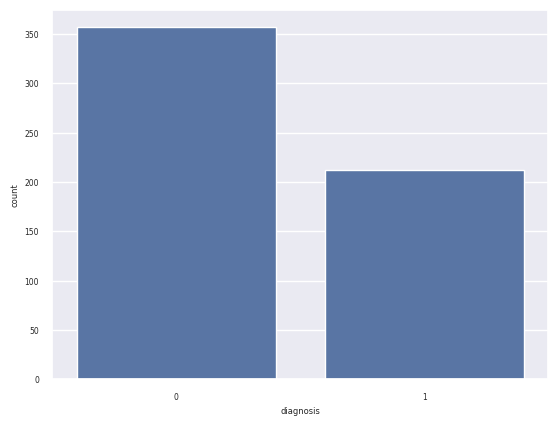

In [12]:
sns.countplot(data = df, x='diagnosis')

Evaluamos si hay multicoliniealidad mediante el VIF, eliminando los amyores x cantidad de veces hasta que el modelo tenga un buen accurracy, normalmente este VIF en las variables debe estar entre 1 a 5 pero muchas veces es un poco mayor, para nuestro caso, hemos dejado un limite mayor, ya que de momento en esta cantidad de veces el modelo queda bien.

In [13]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supongamos que tienes un DataFrame df con tus variables predictoras
# Selecciona solo las columnas numéricas para el cálculo del VIF
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Crea un DataFrame con estas columnas numéricas
X = df[numeric_cols]

# Agrega una constante para el cálculo del VIF
X_with_constant = sm.add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Imprime el resultado
print(vif_data)

                   Variable          VIF
0                     const  1945.673866
1                 diagnosis     4.431144
2               radius_mean  3817.259795
3              texture_mean    11.891280
4            perimeter_mean  3792.697001
5                 area_mean   348.115385
6           smoothness_mean     8.194309
7          compactness_mean    51.445960
8            concavity_mean    71.002747
9       concave points_mean    60.172431
10            symmetry_mean     4.220806
11   fractal_dimension_mean    15.756978
12                radius_se    75.737325
13               texture_se     4.205686
14             perimeter_se    70.398925
15                  area_se    41.196467
16            smoothness_se     4.070801
17           compactness_se    15.366350
18             concavity_se    15.914022
19        concave points_se    11.601253
20              symmetry_se     5.179151
21     fractal_dimension_se     9.724753
22             radius_worst   815.945630
23            te

In [14]:
columdel = ['radius_mean','perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst']
df_copy.drop(columdel, axis=1, inplace=True)

In [15]:
df_copy.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Supongamos que tienes un DataFrame df con tus variables predictoras
# Selecciona solo las columnas numéricas para el cálculo del VIF
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns

# Crea un DataFrame con estas columnas numéricas
X = df_copy[numeric_cols]

# Agrega una constante para el cálculo del VIF
X_with_constant = sm.add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Imprime el resultado
print(vif_data)

                   Variable         VIF
0                     const  361.625717
1                 diagnosis    4.085180
2              texture_mean   11.472028
3           smoothness_mean    7.642646
4          compactness_mean   28.134767
5            concavity_mean   62.428783
6       concave points_mean   49.843999
7             symmetry_mean    4.025204
8    fractal_dimension_mean   11.107666
9                 radius_se   33.235045
10               texture_se    4.029604
11             perimeter_se   30.003442
12                  area_se   17.858945
13            smoothness_se    3.899583
14           compactness_se   15.100248
15             concavity_se   14.772489
16        concave points_se   10.030738
17              symmetry_se    4.916879
18     fractal_dimension_se    9.043785
19            texture_worst   17.649775
20         smoothness_worst   10.508860
21        compactness_worst   34.205483
22          concavity_worst   31.442445
23     concave points_worst   34.086194


In [17]:
columdel = ['concavity_mean','concave points_mean']
df_copy.drop(columdel, axis=1, inplace=True)

In [18]:
df_copy.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,8.589,153.40,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,3.398,74.08,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,4.585,94.03,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,3.445,27.23,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,5.438,94.44,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
# Supongamos que tienes un DataFrame df con tus variables predictoras
# Selecciona solo las columnas numéricas para el cálculo del VIF
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns

# Crea un DataFrame con estas columnas numéricas
X = df_copy[numeric_cols]

# Agrega una constante para el cálculo del VIF
X_with_constant = sm.add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Imprime el resultado
print(vif_data)

                   Variable         VIF
0                     const  353.604178
1                 diagnosis    3.946484
2              texture_mean   11.408888
3           smoothness_mean    6.914490
4          compactness_mean   18.806470
5             symmetry_mean    4.006831
6    fractal_dimension_mean   10.621787
7                 radius_se   32.601837
8                texture_se    3.946023
9              perimeter_se   29.872234
10                  area_se   17.172053
11            smoothness_se    3.765615
12           compactness_se   14.800655
13             concavity_se   11.579744
14        concave points_se    9.105796
15              symmetry_se    4.906759
16     fractal_dimension_se    8.903950
17            texture_worst   17.478129
18         smoothness_worst    9.954885
19        compactness_worst   30.572912
20          concavity_worst   20.862310
21     concave points_worst   19.605734
22           symmetry_worst    9.039626
23  fractal_dimension_worst   18.127052


In [20]:
columdel = ['radius_se','perimeter_se','compactness_worst']
df_copy.drop(columdel, axis=1, inplace=True)

In [21]:
# Supongamos que tienes un DataFrame df con tus variables predictoras
# Selecciona solo las columnas numéricas para el cálculo del VIF
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns

# Crea un DataFrame con estas columnas numéricas
X = df_copy[numeric_cols]

# Agrega una constante para el cálculo del VIF
X_with_constant = sm.add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Imprime el resultado
print(vif_data)

                   Variable         VIF
0                     const  353.221257
1                 diagnosis    3.622245
2              texture_mean   11.286200
3           smoothness_mean    6.720200
4          compactness_mean   14.974560
5             symmetry_mean    3.901210
6    fractal_dimension_mean    9.525123
7                texture_se    3.844884
8                   area_se    2.255723
9             smoothness_se    3.691483
10           compactness_se    9.417627
11             concavity_se   10.512993
12        concave points_se    7.965283
13              symmetry_se    4.752503
14     fractal_dimension_se    7.288438
15            texture_worst   17.282657
16         smoothness_worst    9.895820
17          concavity_worst   18.390217
18     concave points_worst   19.094710
19           symmetry_worst    8.622999
20  fractal_dimension_worst   12.372790


In [22]:
columdel = ['texture_worst','concavity_worst','concave points_worst']
df_copy.drop(columdel, axis=1, inplace=True)

In [23]:
# Supongamos que tienes un DataFrame df con tus variables predictoras
# Selecciona solo las columnas numéricas para el cálculo del VIF
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns

# Crea un DataFrame con estas columnas numéricas
X = df_copy[numeric_cols]

# Agrega una constante para el cálculo del VIF
X_with_constant = sm.add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Imprime el resultado
print(vif_data)

                   Variable         VIF
0                     const  324.188726
1                 diagnosis    3.248727
2              texture_mean    1.787471
3           smoothness_mean    6.454053
4          compactness_mean    9.710396
5             symmetry_mean    3.634355
6    fractal_dimension_mean    7.746928
7                texture_se    2.032184
8                   area_se    2.120653
9             smoothness_se    3.352996
10           compactness_se    8.827758
11             concavity_se    4.016013
12        concave points_se    4.208828
13              symmetry_se    4.023121
14     fractal_dimension_se    6.014786
15         smoothness_worst    8.338522
16           symmetry_worst    7.136031
17  fractal_dimension_worst    8.875592


In [24]:
df_copy.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


Empezamos a crear nuestro modelo

In [25]:
x1 = df_copy.drop('diagnosis',axis=1)
y1 = df_copy.diagnosis

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.2, random_state=42, shuffle=True)

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(x_test)

como podemos ver el acurracy es bastante bueno al igual que nuestra matriz de confusion.

In [30]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[70  1]
 [ 3 40]]
0.9649122807017544


finalmente le damos los datos para que nos ayude a predecir si los datos suministrados son para un tumor maligno o benigno.

In [31]:
import numpy as np

# Valores de ejemplo para las características (texture_mean, smoothness_mean, etc.)
valor_texture_mean = 16.84
valor_smoothness_mean = 0.10310
valor_compactness_mean = 0.05943
valor_symmetry_mean = 0.1675
valor_fractal_dimension_mean = 0.06503
valor_texture_se = 0.7294
valor_area_se = 8.205
valor_smoothness_se = 0.005488
valor_compactness_se = 0.016460
valor_concavity_se = 0.02322
valor_concave_points_se = 0.005917
valor_symmetry_se = 0.014280
valor_fractal_dimension_se = 0.002582
valor_smoothness_worst = 0.14940
valor_symmetry_worst = 0.3105
valor_fractal_dimension_worst = 0.08301

valores_ejemplo = np.array([[valor_texture_mean, valor_smoothness_mean, valor_compactness_mean,
                             valor_symmetry_mean, valor_fractal_dimension_mean, valor_texture_se,
                             valor_area_se, valor_smoothness_se, valor_compactness_se, valor_concavity_se,
                             valor_concave_points_se, valor_symmetry_se, valor_fractal_dimension_se,
                             valor_smoothness_worst, valor_symmetry_worst, valor_fractal_dimension_worst]])

# Escalar los valores de ejemplo
sc_x2 = StandardScaler().fit(x_train)

valores_ejemplo_escalados = sc_x2.transform(valores_ejemplo)

# Realizar la predicción con el modelo de regresión logística
prediccion = model.predict(valores_ejemplo_escalados)

# Imprimir la predicción
print(f'Predicción de Diagnosis: {prediccion[0]}')

Predicción de Diagnosis: 1
